Задача взята с Kaggle, нужно предсказать кто из пассажиров выживет (бинарная классификация)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
titanic_data = pd.read_csv("C:/Users/Vano/Downloads/train.csv")

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
X[X['Embarked'].isna() == True]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,female,38.0,0,0,80.0,NaN
829,1,female,62.0,0,0,80.0,NaN


In [11]:
titanic_data.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                       NaN
Name: 61, dtype: object

In [12]:
titanic_data.loc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Cabin                                                B28
Embarked                                             NaN
Name: 829, dtype: object

скорее всего отсутствие пункта отправки означает то что пассажир не сел на титаник, что значит что он сто процентов выжил

In [13]:
X = X.fillna({'Age':X.Age.median()})

In [14]:
y = titanic_data.Survived

In [15]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.datasets import make_classification

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [16]:
clf = tree.DecisionTreeClassifier()

In [17]:
X = pd.get_dummies(X)

In [18]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [19]:
clf.fit(X, y)

DecisionTreeClassifier()

In [20]:

# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(clf, feature_names=list(X), class_names=['Died', 'Survived'],
out_file='C:/Users/Vano/ML_pet/img/big_tree.dot', filled=True)
!dot -Tpng 'C:/Users/Vano/ML_pet/img/big_tree.dot' -o 'C:/Users/Vano/ML_pet/img/big_tree.dot'

"dot" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [21]:
clf.score(X, y)

0.9797979797979798

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
clf.score(X_test, y_test)

0.7423728813559322

скор модели на тестовых данных получился низкий, поэтому переопределим ее

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [26]:
clf.score(X_test, y_test)

0.8101694915254237

видно что скор стал больше, нужно подобрать гиперпараметры для улучшения работы модели

In [27]:
max_depth_values = range(1, 100)
scores = pd.DataFrame()

In [28]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    clf.fit(X_train, y_train)  
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean() 

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})

    scores = pd.concat([scores, temp_score_data], ignore_index=True)  


In [29]:
scores

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
1,2,0.805369,0.776271,0.770196
2,3,0.823826,0.820339,0.790322
3,4,0.833893,0.823729,0.788627
4,5,0.840604,0.806780,0.802073
...,...,...,...,...
94,95,0.979866,0.786441,0.778585
95,96,0.979866,0.772881,0.766821
96,97,0.979866,0.769492,0.771863
97,98,0.979866,0.766102,0.768487


In [30]:
scores.sort_values(by = ['cross_val_score'], ascending=False)

,max_depth,train_score,test_score,cross_val_score
7,8,0.907718,0.789831,0.807087
5,6,0.867450,0.769492,0.805434
4,5,0.840604,0.806780,0.802073
9,10,0.926174,0.810169,0.800350
6,7,0.882550,0.783051,0.798697
...,...,...,...,...
43,44,0.979866,0.783051,0.761779
63,64,0.979866,0.766102,0.761779
52,53,0.979866,0.762712,0.761779
67,68,0.979866,0.786441,0.761779


кажется, что оптимальной будет глубина 8

построим график чтобы убедиться в этом

In [31]:
scores_data = pd.melt(scores, id_vars=['max_depth'], 
                      value_vars=['train_score', 'test_score', 'cross_val_score'],
                     var_name='score_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

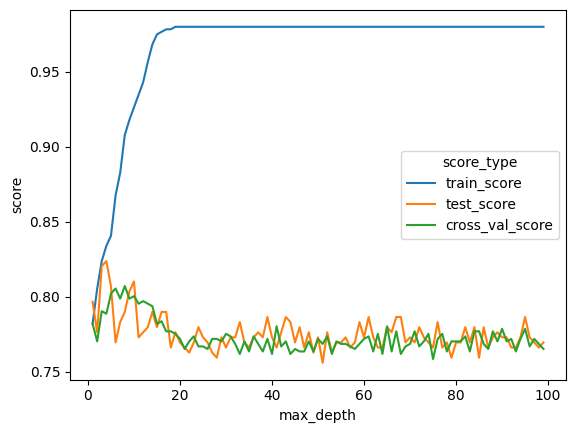

In [32]:
sns.lineplot(x = 'max_depth', y = 'score', data=scores_data, hue = 'score_type')

In [33]:
best_clf = tree.DecisionTreeClassifier(max_depth=8, criterion='entropy')

In [34]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [35]:
best_clf.score(X_test, y_test)

0.7932203389830509

### Определение лучших гипрепараметров с помощью GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

In [39]:
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,20)}

In [37]:
clf = tree.DecisionTreeClassifier()

In [41]:
grid_search_clf = GridSearchCV(clf,tree_params, cv=5)

In [42]:
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)})

выводим лучшие параметры модели

In [47]:
grid_search_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [48]:
best_model = grid_search_clf.best_estimator_

In [49]:
best_model.score(X_test, y_test)

0.8033898305084746

In [53]:
y_pred = best_model.predict(X_test)

In [52]:
best_model.score(X_test, y_test)

0.8033898305084746

In [55]:
precision_score(y_test, y_pred)

0.8369565217391305

In [56]:
recall_score(y_test, y_pred)

0.6416666666666667

In [57]:
y_predicted_proba = best_model.predict_proba(X_test)

In [71]:
y_predicted_proba[:9]

array([[0.8852459 , 0.1147541 ],
       [0.61538462, 0.38461538],
       [0.8852459 , 0.1147541 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.8852459 , 0.1147541 ],
       [0.25      , 0.75      ]])

<Axes: >

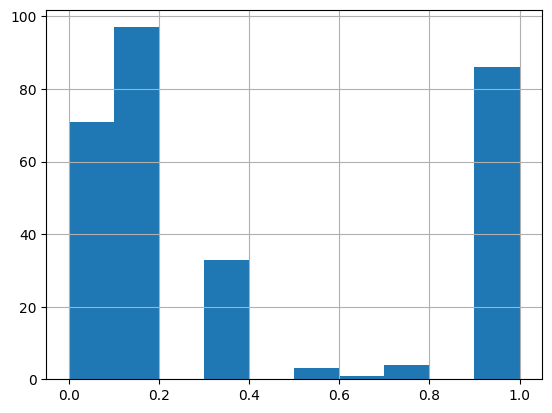

In [75]:
pd.Series(y_predicted_proba[:, 1]).hist()

In [76]:
y_pred = np.where(y_predicted_proba[:, 1] > 0.9, 1, 0)

In [77]:
precision_score(y_test, y_pred)

0.8488372093023255

In [78]:
recall_score(y_test, y_pred)

0.6083333333333333

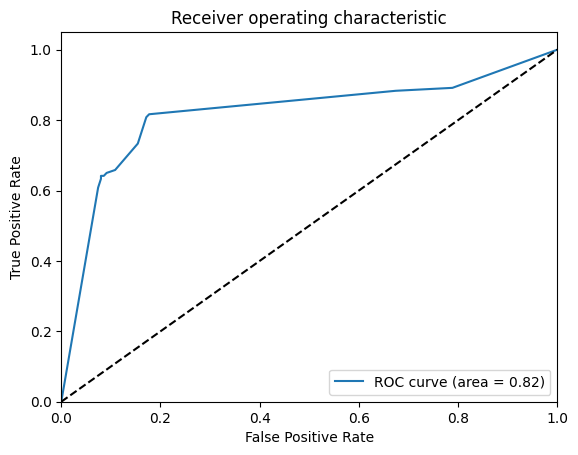

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")